In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:
df = pd.read_csv("C:/Users/이영빈/Desktop/인빅/데이콘/corona-virus-report/covid_19_clean_complete.csv", usecols = ['Date','Country/Region', 'Confirmed'])
df['Date'] = df.Date.astype('datetime64')
df.rename(columns = {'Country/Region' : 'Country'}, inplace = True)
df_france = df[df["Country"] == 'France']
df_france_1=df_france.groupby(by=['Country','Date']).sum()

In [3]:
df2 = pd.read_csv("C:/Users/이영빈/Desktop/인빅/데이콘/coronavirusdataset_20200413/full-list-total-tests-for-covid-19.csv")

df2['Date'] = df2.Date.astype('datetime64')
df2.rename(columns = {'Entity' : 'Country', 'Total tests' : 'Test'}, inplace = True)
df2_france = df2[df2["Country"] == 'France']
df2_france.head()
df2_france_1 = df2_france.groupby(by=['Country','Date']).sum()

In [4]:
df_france_real = pd.merge(df_france_1, df2_france_1, on = 'Date')

In [5]:
cols = ['Confirmed','Test']
df_france_real = df_france_real.join(df_france_real.diff(1).fillna(df_france_real[cols]).add_prefix('1'))
print (df_france_real)

            Confirmed    Test  1Confirmed     1Test
Date                                               
2020-02-24         12      31        12.0      31.0
2020-02-25         14     146         2.0     115.0
2020-02-26         18     412         4.0     266.0
2020-02-27         38     851        20.0     439.0
2020-02-28         57    1316        19.0     465.0
2020-02-29        100    1902        43.0     586.0
2020-03-01        130    2451        30.0     549.0
2020-03-02        191    2887        61.0     436.0
2020-03-03        204    3594        13.0     707.0
2020-03-04        288    4803        84.0    1209.0
2020-03-05        380    6046        92.0    1243.0
2020-03-06        656    7695       276.0    1649.0
2020-03-07        959    9495       303.0    1800.0
2020-03-08       1136   11071       177.0    1576.0
2020-03-09       1219   12667        83.0    1596.0
2020-03-10       1794   15018       575.0    2351.0
2020-03-15       4532   36747      2738.0   21729.0
2020-03-24  

In [7]:
df_france_real = df_france_real[['1Confirmed', '1Test']]

In [13]:
df_france_real.rename(columns = {'1Confirmed' : 'confirmed', '1Test' : 'test'}, inplace = True)

In [17]:
df_france_real['ratio'] = df_france_real['confirmed']/df_france_real['test']
df_france_real['safe_line'] = np.array(0.02)

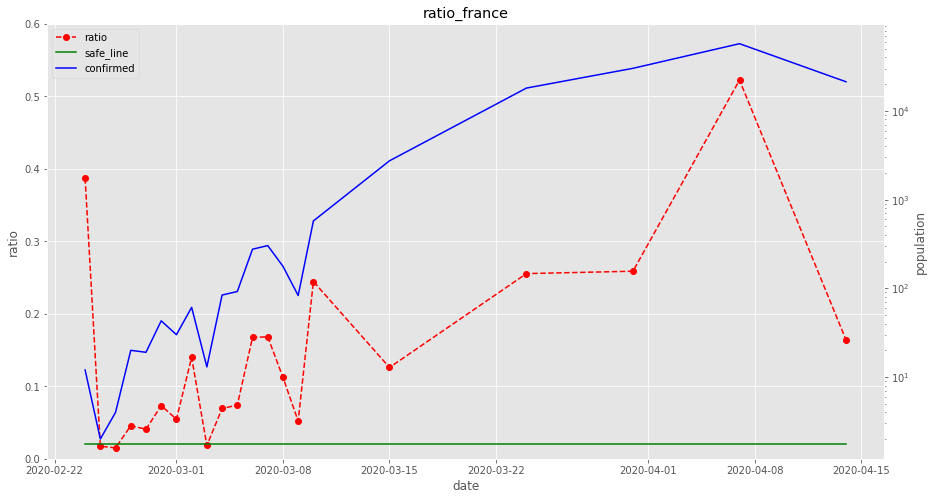

In [22]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize = (15, 8))
ax2 = ax1.twinx()
line1 = ax1.plot(df_france_real.index, df_france_real['ratio'], color = 'r', linestyle = '--', marker = 'o', label = 'ratio')
line2 = ax1.plot(df_france_real.index, df_france_real['safe_line'], color = 'g', label = 'safe_line')
line3 = ax2.plot(df_france_real.index, df_france_real['confirmed'], color = 'b', label = 'confirmed')
ax1.set_title('ratio_france')
ax1.set_xlabel('date')
ax1.set_ylabel('ratio')
ax2.set_ylabel('population')
plt.yscale("log")
ax1.set_ylim(0, 0.6)
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc = 2)
plt.grid(False)
plt.show()